<a href="https://colab.research.google.com/github/MegatronRobot/AdvancedLearningAlgosCourse/blob/main/Week1/layers_and_neurons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# based on keras interface
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
import logging
tf.autograph.set_verbosity(0)

**Neuron without activation - Regression/Linear Model**

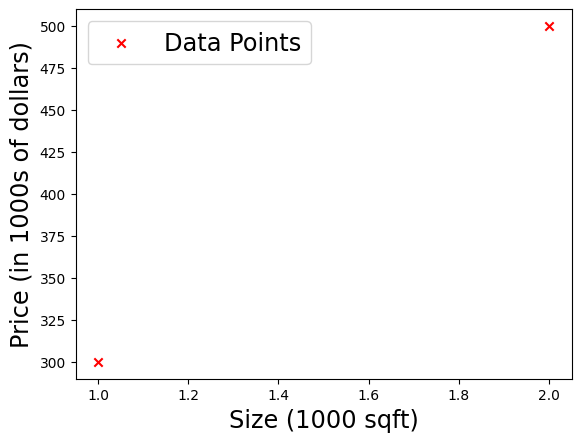

In [8]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32) # size in 1000 square feet
Y_train = np.array([[300.0], [500.0]], dtype=np.float32) # price in 1000s of dollars
# m = 2, n = 1

fig, ax = plt.subplots(1, 1)
ax.scatter(X_train, Y_train, marker="x", c="r", label="Data Points")
ax.legend(fontsize="xx-large")
ax.set_ylabel("Price (in 1000s of dollars)", fontsize="xx-large")
ax.set_xlabel("Size (1000 sqft)", fontsize="xx-large")
plt.show()

In [9]:
# The function implemented by a neuron with no activation is the same as linear regression:
linear_layer = tf.keras.layers.Dense(units=1, activation="linear")

In [10]:
linear_layer.get_weights()

[]

In [13]:
# this will trigger the instantiation of the weights
#X_train = np.asarray(X_train).astype('float32') #keep it float 32 to avoid error
a1 = linear_layer(X_train[0].reshape(1, 1))
print(a1)

tf.Tensor([[-1.3771163]], shape=(1, 1), dtype=float32)


In [15]:
w, b = linear_layer.get_weights()
print(f"w = {w}, b = {b}")  # weights are randomly initialized to small number and bias defaulting to zero

w = [[-1.3771163]], b = [0.]


In [16]:
# we can set {w} and {b} to some known values
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [17]:
# comparing outputs to linear regression
a1 = linear_layer(X_train[0].reshape(1, 1))
print(a1)
alin = np.dot(set_w, X_train[0].reshape(1, 1))+set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [19]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot(X_train, set_w) + set_b
print(prediction_tf)
print(prediction_np)

tf.Tensor(
[[300.]
 [500.]], shape=(2, 1), dtype=float32)
[[300.]
 [500.]]


**Neuron with Sigmoid Activation**

which is same as logistic regression

In [20]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1, 1)
Y_train = np.array([0, 0, 0, 1, 1, 1], dtype=np.float32).reshape(-1, 1)

In [21]:
pos = Y_train == 1
neg = Y_train == 0
X_train[pos]

array([3., 4., 5.], dtype=float32)

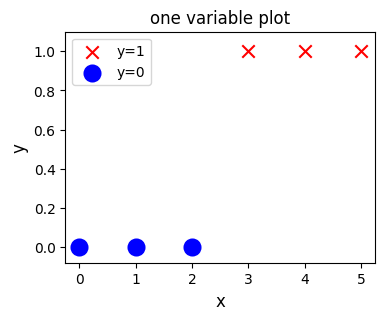

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.scatter(X_train[pos], Y_train[pos], marker="x", s=80, c="red", label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker="o", s=100,c="blue", label="y=0", lw=3)

ax.set_ylim(-0.08, 1.1)
ax.set_ylabel("y", fontsize=12)
ax.set_xlabel("x", fontsize=12)
ax.set_title("one variable plot")
plt.legend()
plt.show()

### Logistic Neuron
We can implement a 'logistic neuron' by adding a sigmoid activation. The function of the neuron is then described by (2) above.   
This section will create a Tensorflow Model that contains our logistic layer to demonstrate an alternate method of creating models. Tensorflow is most often used to create multi-layer models. The [Sequential](https://keras.io/guides/sequential_model/) model is a convenient means of constructing these models.

In [23]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1, activation="sigmoid", name="L1")
    ]
)

In [24]:
# model.summary() shows the layers and number of parameters in the model
# here one layer and one neuron and it has two parameters, w and b
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
logistic_layer = model.get_layer("L1")
w, b = logistic_layer.get_weights()
print(w, b)
print(w.shape, b.shape)

[[0.89502347]] [0.]
(1, 1) (1,)


In [26]:
# Let's set weight and bias to some known values
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [28]:
def sigmoidnp(z):
  return 1/(1+np.exp(-z))

In [29]:
# comparing output to original logistic regression
a1 = model.predict(X_train[0].reshape(1, 1))
print(a1)
alog = sigmoidnp(np.dot(set_w, X_train[0].reshape(1, 1))+set_b)
print(alog)

1/1 [==============================] - 0s 26ms/step
[[0.01098694]]
[[0.01098694]]


In [35]:
# Now we can use our logistic layer and Numpy moel to make predictions
prediction = model.predict(X_train)
print(prediction)

1/1 [==============================] - 0s 35ms/step
[[0.01098694]
 [0.07585818]
 [0.37754068]
 [0.8175745 ]
 [0.97068775]
 [0.99592984]]
